In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Understanding The Data


In [2]:
dataframe = pd.read_csv("./diabetes.csv")
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
dataframe.shape

(768, 9)

In [5]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
dataframe["Outcome"].unique()

array([1, 0])

In [7]:
# Check Missing Values
dataframe.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# Check More Data (BloodPressure->0,SkinThickness->0,Insulin->0)
dataframe.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# EDA [Feature Selection + Data Imputation]

- very Imp


In [9]:
dataframe.corr()
# Range From -1 to 1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [10]:
# Check High Correlation
def high_correlation(dataframe, threshold):
    cols_corr = set()
    dataframe_corr = dataframe.corr()
    for i in range(len(dataframe_corr.columns)):
        for j in range(i + 1, len(dataframe_corr.columns)):
            if abs(dataframe_corr.iloc[i, j]) > threshold:
                cols_corr.add(dataframe_corr.columns[i])
                cols_corr.add(dataframe_corr.columns[j])
    return cols_corr


print(high_correlation(dataframe, 0.85))

set()


<Axes: >

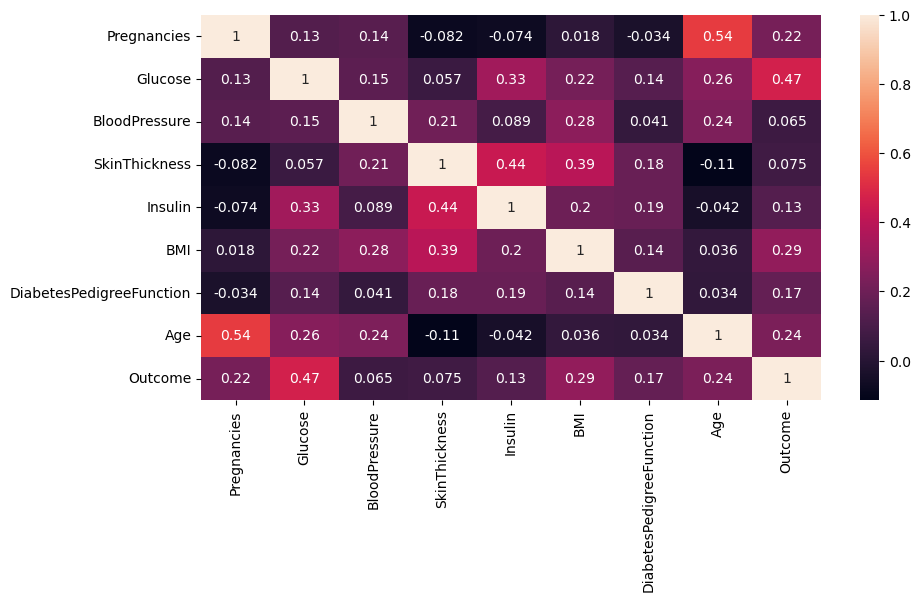

In [11]:
plt.figure(figsize=(10, 5))
sns.heatmap(dataframe.corr(), annot=True)
# plt.savefig("../images/diabetes_Correlation_Heatmap.jpg")

# No High Correlation >0.85 , So All Features Important

In [12]:
# Descriptive Statistics
dataframe.describe()

"""
count 	-> tell Not Null Values
mean	-> For Standard Normal Distribution Data Mean = 0
std		-> For Standard Normal Distribution Data Standard Deviation = 1

"""

'\ncount \t-> tell Not Null Values\nmean\t-> For Standard Normal Distribution Data Mean = 0\nstd\t\t-> For Standard Normal Distribution Data Standard Deviation = 1\n\n'

## Data Imputation

### Symmetric

- Normally Distributed

### Non Symmetric -> Outliers

- Left Skewed (more data on right)
- Right Skewed (more data on left)


In [13]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Figure size 1000x500 with 0 Axes>

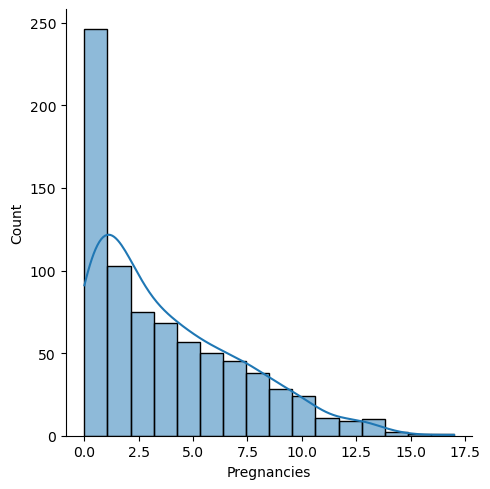

In [15]:
plt.figure(figsize=(10, 5))
sns.displot(dataframe["Pregnancies"], kde=True)  # Right Skewed => MEDIAN
# plt.savefig("../images/Pregnancies_Distribution.jpg")
dataframe["Pregnancies"] = dataframe["Pregnancies"].replace(
    0, dataframe["Pregnancies"].median()
)

<Figure size 1000x500 with 0 Axes>

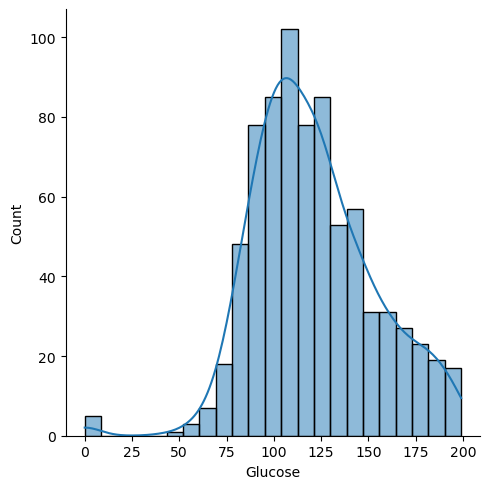

In [16]:
plt.figure(figsize=(10, 5))
sns.displot(dataframe["Glucose"], kde=True)  # Symmetric => MEAN
# plt.savefig("../images/Glucose_Distribution.jpg")
dataframe["Glucose"] = dataframe["Glucose"].replace(0, dataframe["Glucose"].mean())

<Figure size 1000x500 with 0 Axes>

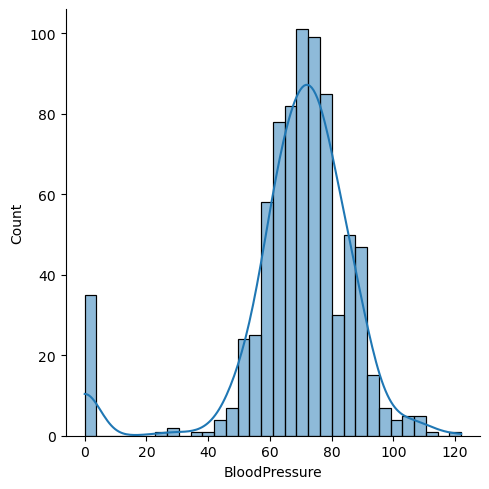

In [17]:
plt.figure(figsize=(10, 5))
sns.displot(dataframe["BloodPressure"], kde=True)  # Symmetric => MEAN
# plt.savefig("../images/BloodPressure.jpg")
dataframe["BloodPressure"] = dataframe["BloodPressure"].replace(
    0, dataframe["BloodPressure"].mean()
)

<Figure size 1000x500 with 0 Axes>

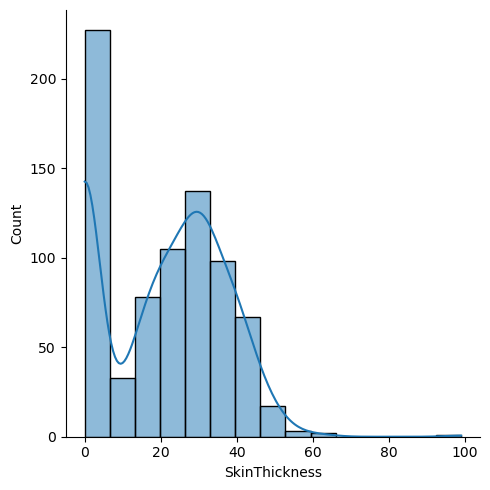

In [18]:
plt.figure(figsize=(10, 5))
sns.displot(dataframe["SkinThickness"], kde=True)  #  MEAN
# plt.savefig("../images/SkinThickness_Distribution.jpg")
dataframe["SkinThickness"] = dataframe["SkinThickness"].replace(
    0, dataframe["SkinThickness"].mean()
)

<Figure size 1000x500 with 0 Axes>

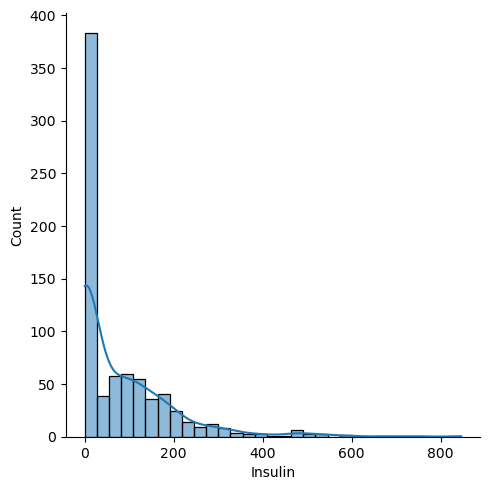

In [19]:
plt.figure(figsize=(10, 5))
sns.displot(dataframe["Insulin"], kde=True)  #  MEDIAN
# plt.savefig("../images/Insulin_Distribution.jpg")
dataframe["Insulin"] = dataframe["Insulin"].replace(0, dataframe["Insulin"].median())

<Figure size 1000x500 with 0 Axes>

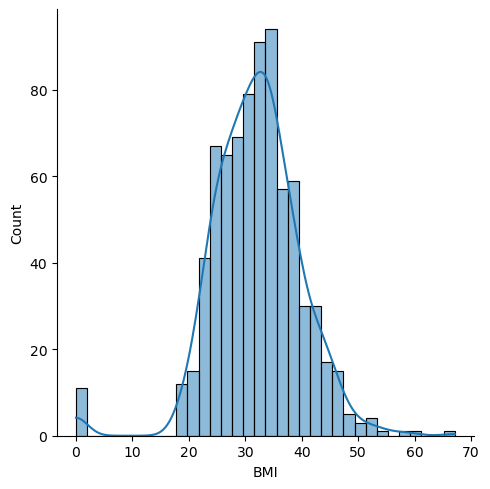

In [20]:
plt.figure(figsize=(10, 5))
sns.displot(dataframe["BMI"], kde=True)  #  MEAN
# plt.savefig("../images/BMI_Distribution.jpg")
dataframe["BMI"] = dataframe["BMI"].replace(0, dataframe["BMI"].mean())

<Figure size 1000x500 with 0 Axes>

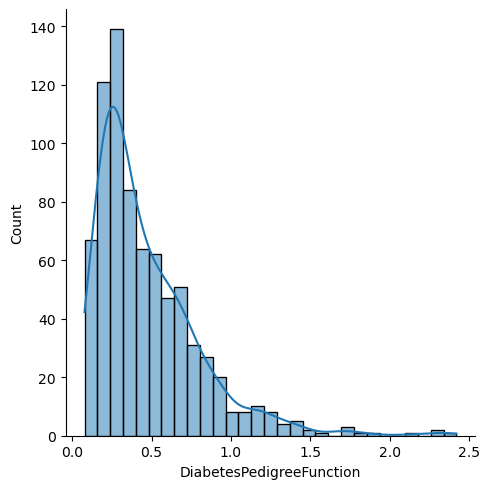

In [21]:
plt.figure(figsize=(10, 5))
sns.displot(dataframe["DiabetesPedigreeFunction"], kde=True)  #  MEDIAN
# plt.savefig("../images/DiabetesPedigreeFunction_Distribution.jpg")
dataframe["DiabetesPedigreeFunction"] = dataframe["DiabetesPedigreeFunction"].replace(
    0, dataframe["DiabetesPedigreeFunction"].median()
)

<Figure size 1000x500 with 0 Axes>

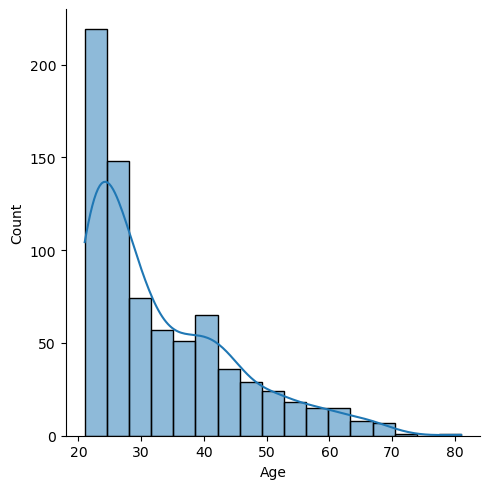

In [22]:
plt.figure(figsize=(10, 5))
sns.displot(dataframe["Age"], kde=True)  #  MEDIAN
# plt.savefig("../images/Age_Distribution.jpg")
dataframe["Age"] = dataframe["Age"].replace(0, dataframe["Age"].median())

# EDA [Outlier Detection + Normalization]

In [23]:
# Splitting Of Data [Independent & Dependent]
# dataframe.iloc[:,:-1]
X = dataframe.drop(columns=["Outcome"], axis=1)
y = dataframe["Outcome"]

print(X.shape, y.shape)

(768, 8) (768,)


<Axes: >

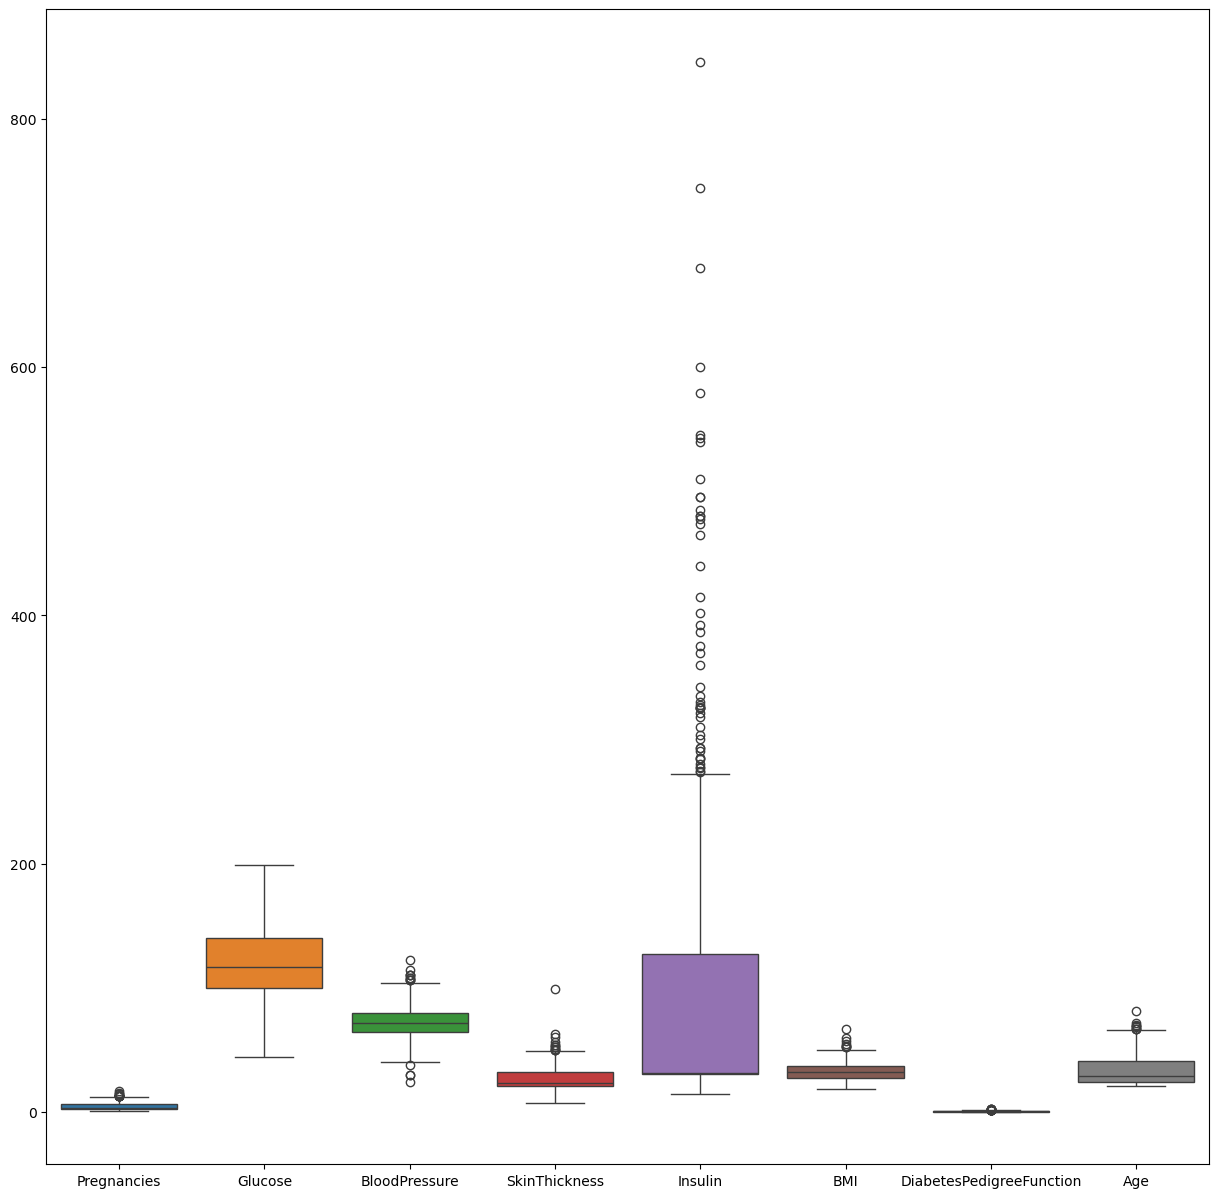

In [25]:
# Outlier Detection -> BoxPlot
plt.figure(figsize=(15, 15))
sns.boxplot(X)
# plt.savefig("../images/Boxplot_InputFeatures.jpg")

In [26]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Outlier Detection Method 1 -> Box Plot


In [27]:
cols = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age",
]

mask = np.ones(X.shape[0], dtype=bool)

for col in cols:
    Q1 = np.percentile(X[col], 25)
    Q3 = np.percentile(X[col], 75)
    IQR = Q3 - Q1
    lowerWhisker = Q1 - 1.5 * IQR
    upperWhisker = Q3 + 1.5 * IQR
    mask &= (X[col] >= lowerWhisker) & (X[col] <= upperWhisker)

    """ &= Ensures Reduction of All Columns Outliers """


X_noOutlier1 = X[mask]
y_noOutlier1 = y[mask]

X.shape, y.shape, X_noOutlier1.shape, y_noOutlier1.shape

((768, 8), (768,), (689, 8), (689,))

<Axes: >

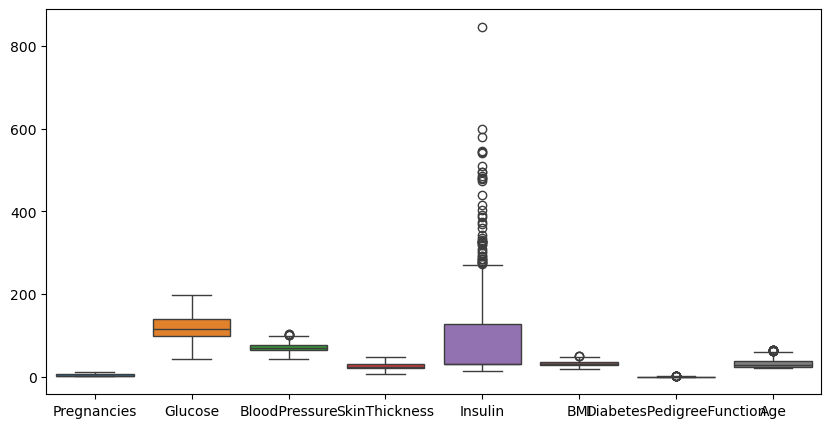

In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(X_noOutlier1)

# Outlier Removal Method-2
- More Customizable

In [29]:
# Quantile Based Filtering On Insulin
q = np.percentile(X["Insulin"], 95)
mask = X["Insulin"] < q  # True Condition

X_noOutlier2 = X_noOutlier1[mask]
y_noOutlier2 = y_noOutlier1[mask]

X_noOutlier2.shape, y_noOutlier2.shape

/var/folders/hb/k7qx35xx13dc1rhhhkjbjrnh0000gp/T/ipykernel_3773/1254521333.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_noOutlier2 = X_noOutlier1[mask]


((653, 8), (653,))

<Axes: >

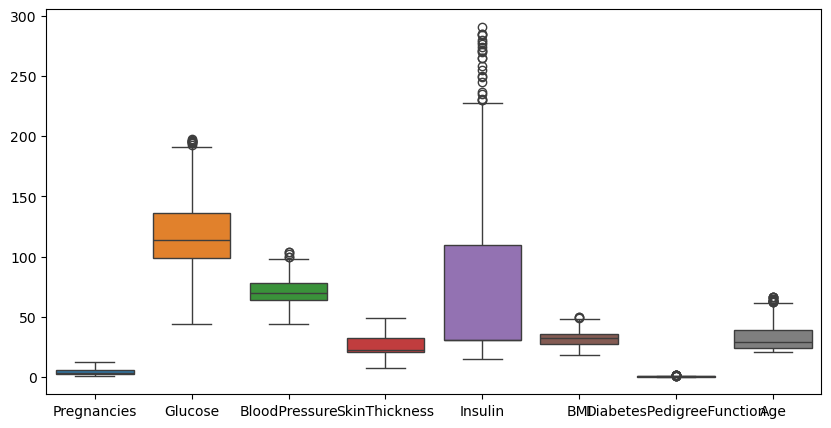

In [30]:
plt.figure(figsize=(10, 5))
sns.boxplot(X_noOutlier2)

# Splitting Of Data

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_noOutlier2, y_noOutlier2, test_size=0.25, random_state=42
)

## Standardization


In [32]:
# Standard Normalization mean = 0, Standard Deviation = 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Normalized, But Still Outliers
# Important Normalization to reduce the biasness of the model to a particular Feature

In [33]:
# plt.figure(figsize=(12, 5))
# sns.boxplot(pd.DataFrame(X_train_scaled, columns=cols))
# plt.savefig("../images/NormalizedData_ReducedOutlier.jpg")/

# Handling Imbalanced Data
- Over Sampling [Minority increase to match Majority]
- UnderSampling [Majority decrese to match Minority]
- SMOTE [Generate Synthetic Data & increase data points to match Majority]

In [34]:
print("X Train Size: \t", X_train_scaled.shape)
print("X Test Size: \t", X_test_scaled.shape)

X Train Size: 	 (489, 8)
X Test Size: 	 (164, 8)


In [35]:
# Imbalanced DataSet [Eg: HealthCare People With diseases Less So Imbalanced Dataset]
y_train.value_counts()

Outcome
0    336
1    153
Name: count, dtype: int64

In [36]:
# Applying SMOTE Technique
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print(pd.Series(y_train_resampled).value_counts())

Outcome
1    336
0    336
Name: count, dtype: int64


# Model Training


In [37]:
from sklearn.linear_model import LogisticRegression

classification = LogisticRegression()
classification.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

# Model Prediction & Evaluation

In [38]:
y_pred = classification.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [39]:
classification.coef_

array([[ 0.345955  ,  1.46059696, -0.11423541, -0.02021654, -0.23895781,
         0.81233885,  0.20745015,  0.05902692]])

In [40]:
classification.intercept_

array([-0.3854253])

In [41]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7439024390243902

In [42]:
from sklearn.metrics import classification_report

target_names = ["Non-Diabetic", "Diabetic"]
classi_rep = classification_report(y_test, y_pred, target_names=target_names)
print(classi_rep)
# Healthcare->recall is very Important Metric

              precision    recall  f1-score   support

Non-Diabetic       0.82      0.78      0.80       108
    Diabetic       0.61      0.68      0.64        56

    accuracy                           0.74       164
   macro avg       0.72      0.73      0.72       164
weighted avg       0.75      0.74      0.75       164



# Saving The Model

In [43]:
# import pickle

# pickle.dump(classification, open("../models/diabetes_pred_model.pkl", "wb"))
# pickle.dump(scaler, open("../models/diabetes_pred_scaler.pkl", "wb"))

In [44]:
# model = pickle.load(open("../models/diabetes_pred_model.pkl", "rb"))
# scaler = pickle.load(open("../models/diabetes_pred_scaler.pkl", "rb"))

In [45]:
# model.predict(scaler.transform(X_test))

# Naive baye's

In [46]:
# Gaussian Naive Baye's
from sklearn.naive_bayes import GaussianNB

model_gaussian_naive_bayes = GaussianNB()
model_gaussian_naive_bayes.fit(X_train_resampled, y_train_resampled)
y_pred_gaussian_naive_bayes = model_gaussian_naive_bayes.predict(X_test_scaled)
y_pred_gaussian_naive_bayes

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1])

In [47]:
# Evaluate Gaussian Naive Bayes
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_gaussian_naive_bayes))

print(classification_report(y_test, y_pred_gaussian_naive_bayes))

[[83 25]
 [17 39]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       108
           1       0.61      0.70      0.65        56

    accuracy                           0.74       164
   macro avg       0.72      0.73      0.72       164
weighted avg       0.75      0.74      0.75       164



In [48]:
model_gaussian_naive_bayes.score(X_test_scaled, y_test)  # Logistic Regression

0.7439024390243902

In [49]:
accuracy_score(y_test, y_pred)  # Logistic Regression

0.7439024390243902

#  KNN


In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train_resampled, y_train_resampled)

y_pred_knn = knn.predict(X_test_scaled)

In [51]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[79 29]
 [18 38]]
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       108
           1       0.57      0.68      0.62        56

    accuracy                           0.71       164
   macro avg       0.69      0.71      0.69       164
weighted avg       0.73      0.71      0.72       164

